# **Bayesian_filter_for_diabaties_diagonasis**:

---



https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/code

In [ ]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing

In [ ]:
# load dataset and displays the first 10 rows of the DataFrame
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
# print a list of column names
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
data.shape

(100000, 9)

In [ ]:
# check the number of missing values in each column
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# remove missing values (NaN)
data.dropna()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<ipython-input-51-2582ce2f86cc>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


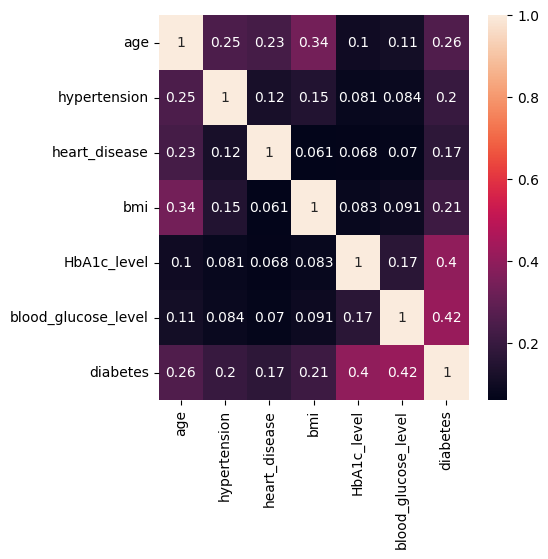

In [ ]:
# creating a heatmap of the correlation matrix

plt.figure(figsize=(5,5))

# Calculate the correlation matrix
corr = data.corr()

sns.heatmap(corr, annot=True)
plt.show()

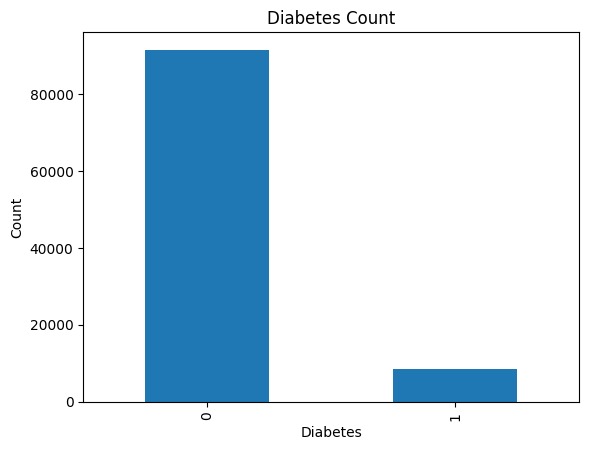

In [ ]:
# A bar plot of diabetes coloumn

data['diabetes'].value_counts().plot(kind='bar')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes Count')
plt.show()

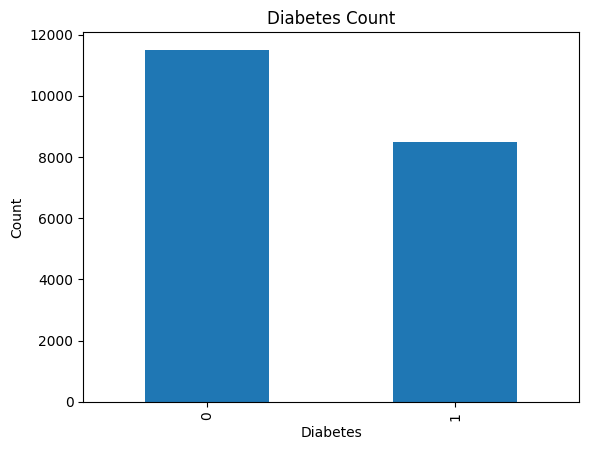

In [ ]:
# since there is high imbalance in the dataset , so we removed 80000 data from the dataset of class 0 to make it more balanced
data.drop(data[data['diabetes'] == 0].sample(80000).index, inplace=True)
data['diabetes'].value_counts().plot(kind='bar')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes Count')
plt.show()

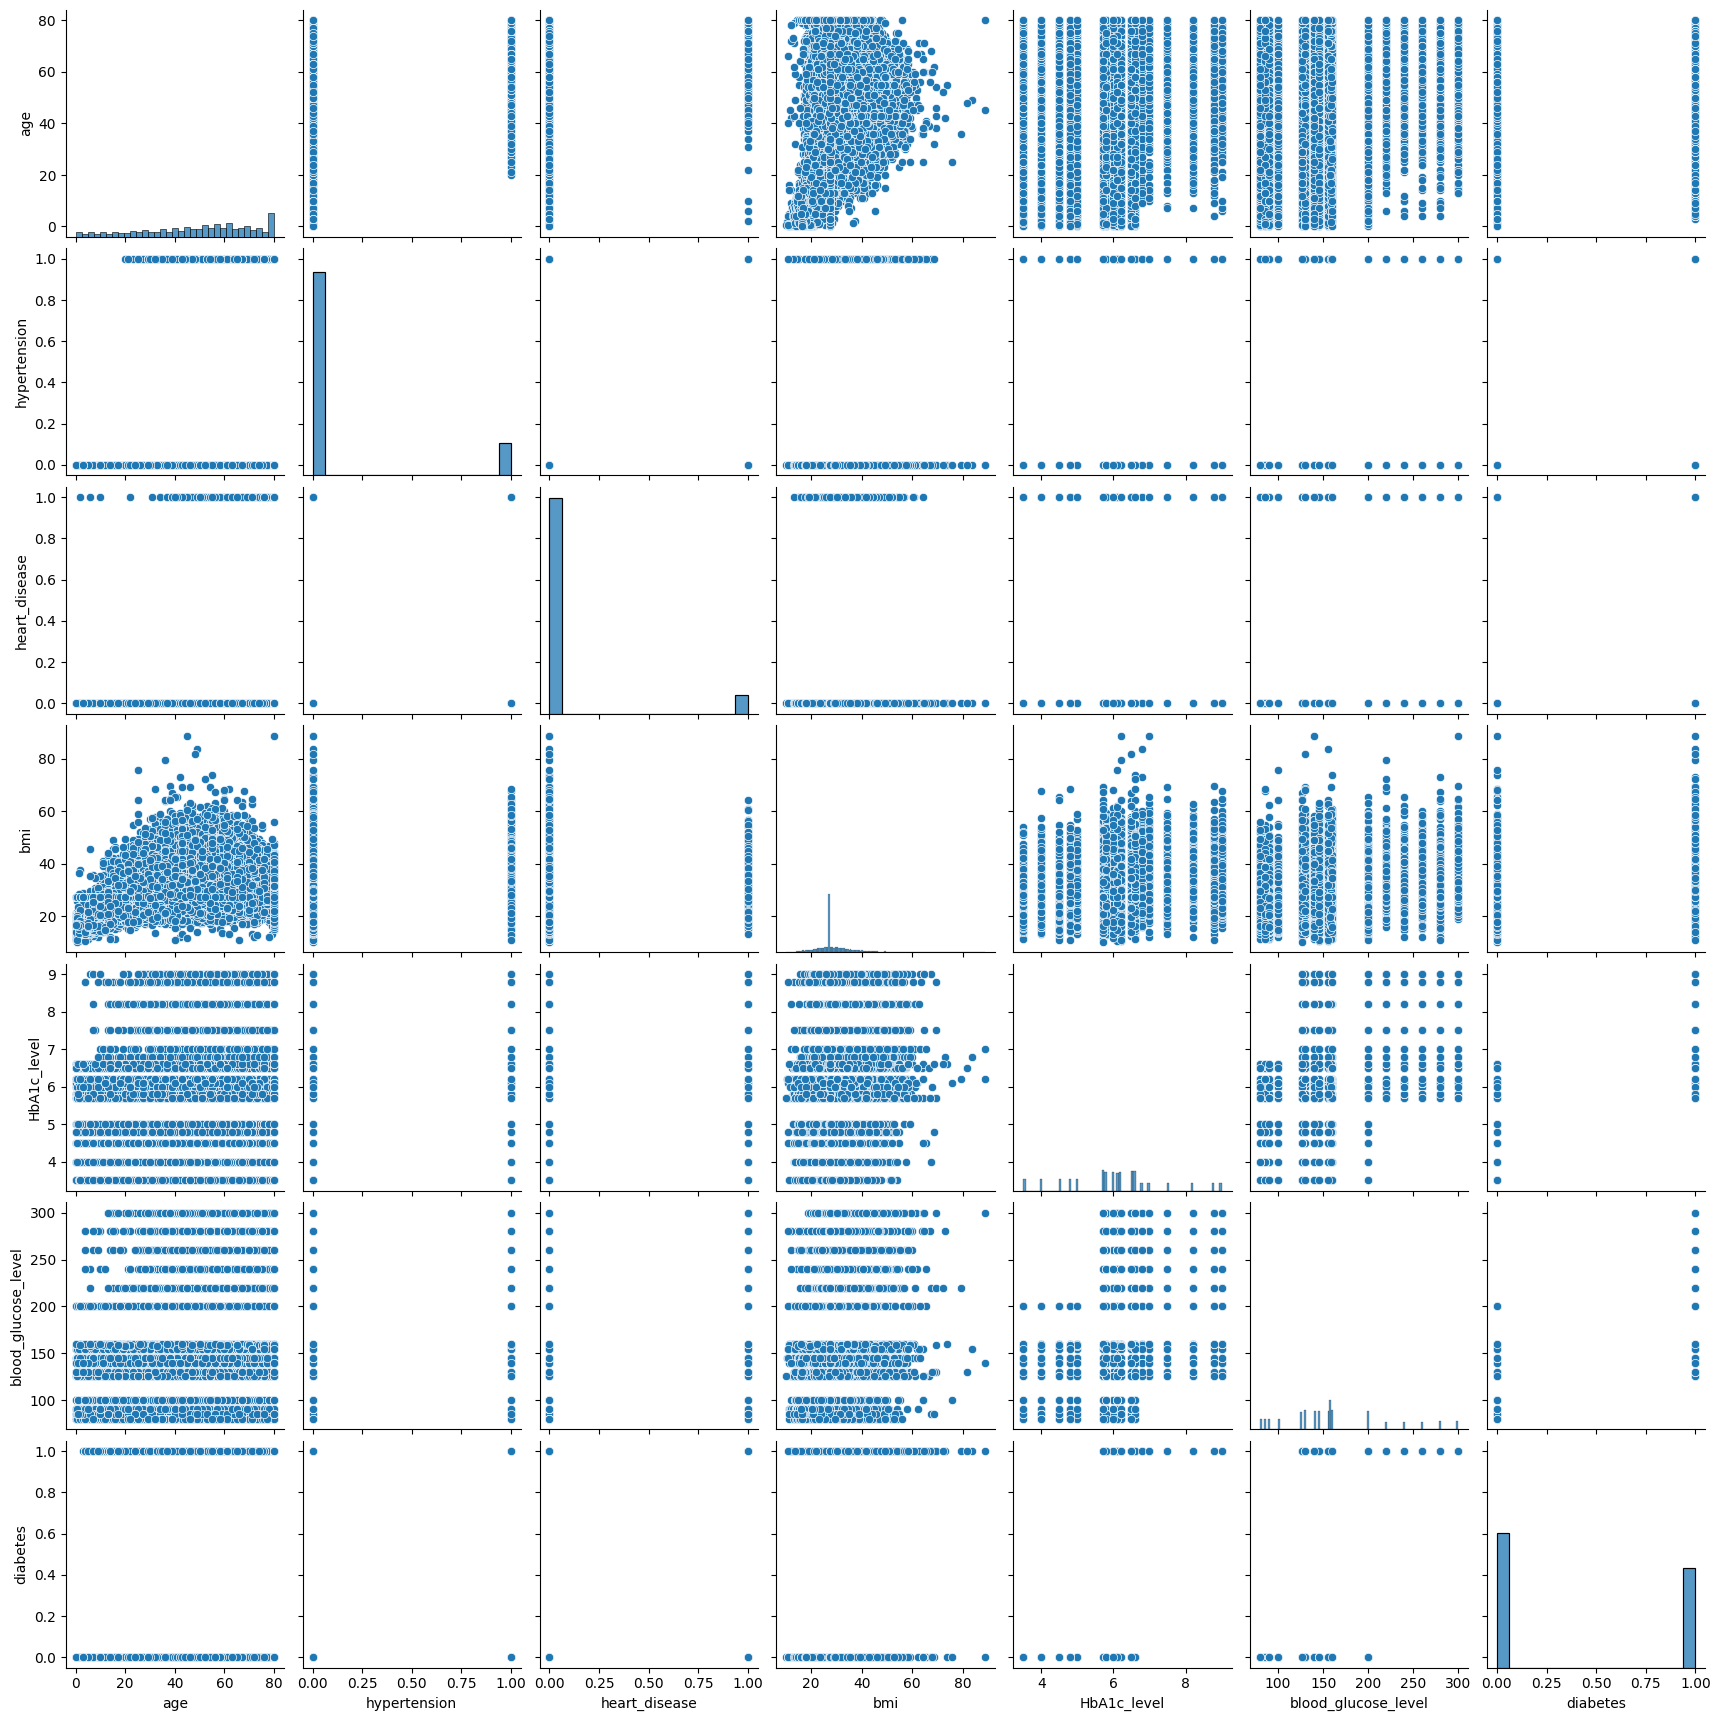

In [ ]:
# scatter plot

sns.pairplot(data)
plt.show()

In [ ]:
# perform one-hot encoding on the 'gender' and 'smoking_history' columns

data_encoded = pd.get_dummies(data, columns=['gender', 'smoking_history'])
data_encoded.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
6,44.0,0,0,19.31,6.5,200,1,1,0,0,0,0,0,0,1,0
7,79.0,0,0,23.86,5.7,85,0,1,0,0,1,0,0,0,0,0
9,32.0,0,0,27.32,5.0,100,0,1,0,0,0,0,0,0,1,0
11,54.0,0,0,54.70,6.0,100,0,1,0,0,0,0,0,1,0,0
26,67.0,0,1,27.32,6.5,200,1,0,1,0,0,0,0,0,0,1


In [ ]:
data_encoded.shape

(20000, 16)

In [ ]:
# split your data into training and testing sets fo assessing model's performance

from sklearn.model_selection import train_test_split
features = data_encoded.drop('diabetes', axis=1)
label = data_encoded['diabetes']
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.20, random_state=42)
feature_train, label_train ,feature_test,label_test = train_test_split(features,label , test_size = 0.2, random_state = 42)

# **Model Implementation**

In [ ]:
import pandas as pd
import numpy as np

# Initializes the class with two empty dictionaries:
# class_probabilities for storing class probabilities and feature_probabilities for storing feature-specific probabilities.

class BayesianFilter:
    def __init__(self):
        self.class_probabilities = {}
        self.feature_probabilities = {}

# train method in bayesian filter class

    def train(self, X_train, y_train):

        # Calculate class probabilities
        total_samples = len(y_train)
        for class_value in set(y_train):
            self.class_probabilities[class_value] = y_train.value_counts()[class_value] / total_samples

        # Calculate feature probabilities
        for feature in X_train.columns:
            self.feature_probabilities[feature] = {}
            for class_value in set(y_train):
                feature_values = X_train.loc[y_train == class_value, feature]
                self.feature_probabilities[feature][class_value] = {
                    'mean': feature_values.mean(),
                    'std': feature_values.std()
                }
# helper method

    def calculate_probability(self, x, mean, std):
        if std == 0:
            # Handle case where standard deviation is zero
            return 1 if x == mean else 0
        else:
            exponent = ((x - mean) ** 2) / (2 * (std ** 2))
            return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-exponent)

    def predict(self, X_test):
        predictions = []
        for _, row in X_test.iterrows():
            class_probabilities = {}
            for class_value in self.class_probabilities:
                class_probabilities[class_value] = self.class_probabilities[class_value]
                for feature in X_test.columns:
                    mean = self.feature_probabilities[feature][class_value]['mean']
                    std = self.feature_probabilities[feature][class_value]['std']
                    x = row[feature]
                    probability = self.calculate_probability(x, mean, std)
                    class_probabilities[class_value] *= probability #calculating the prior probablity

            predicted_class = max(class_probabilities, key=class_probabilities.get)
            predictions.append(predicted_class)
        return predictions




In [ ]:
model = BayesianFilter()
model.train(features_train, label_train)

## **Model Validation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

#make predictions
y_pred = model.predict(features_test)

#calculate accuracy
accuracy = accuracy_score(label_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.79


In [ ]:
print(classification_report(label_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84      2331
           1       0.89      0.57      0.70      1669

    accuracy                           0.79      4000
   macro avg       0.82      0.76      0.77      4000
weighted avg       0.81      0.79      0.78      4000



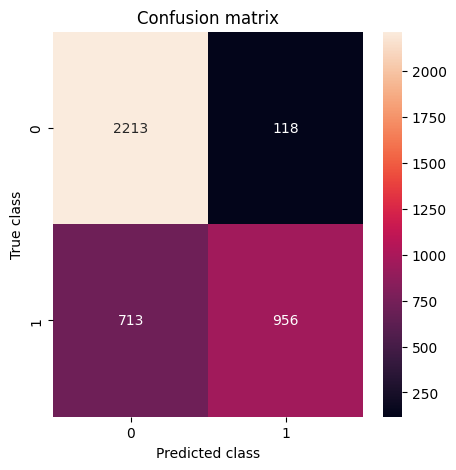

In [ ]:
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix')
plt.show()


Training Accuracy: 0.7913125
Testing Accuracy: 0.79225


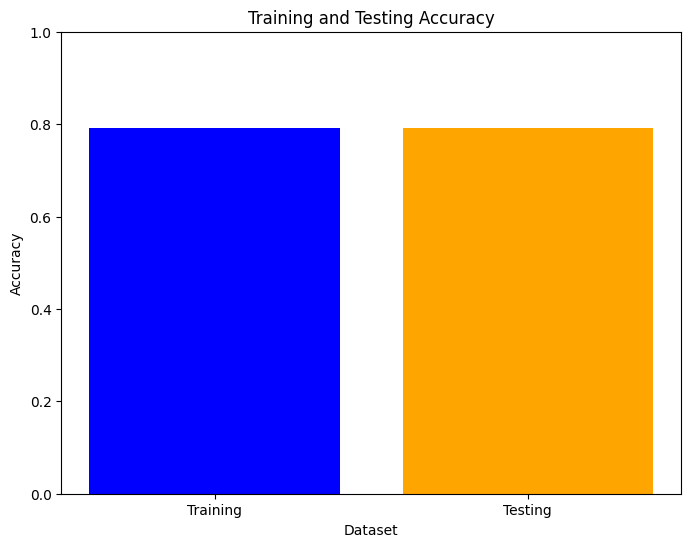

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train_predictions = model.predict(features_train)
train_accuracy = accuracy_score(label_train, train_predictions)
test_predictions =  model.predict(features_test)
test_accuracy = accuracy_score(label_test, y_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.show()
